<a href="https://colab.research.google.com/github/realmistic/PythonInvest-basic-fin-analysis/blob/master/PythonInvest_com_1_Python_Financial_Data_APIs_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Python Finance APIs
* Yahoo finance (yfinance) : historical stock prices (OHLCV) and financial info
* Dynamic graphs with Plotly
* Pandas Datareader : Stock Indexes (SNP500)
* Quandl : Gold prices

# 1. Yahoo Finance
https://pypi.org/project/yfinance/

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 17.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=aa408e91b4e96939329c4f490f64b3c449054e529b0006fbe4974fa41f367e58
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
ticker = 'AAPL'

In [ ]:
aapl = yf.Ticker(ticker)

In [ ]:
aapl.get_institutional_holders()

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1255155794,2020-12-30,0.0748,166546622305
1,Blackrock Inc.,1056461286,2020-12-30,0.0629,140181848039
2,"Berkshire Hathaway, Inc",887135554,2020-12-30,0.0528,117714016660
3,State Street Corporation,638166552,2020-12-30,0.0380,84678319784
4,"FMR, LLC",358551697,2020-12-30,0.0214,47576224674
5,"Geode Capital Management, LLC",247977084,2020-12-30,0.0148,32904079275
6,Price (T.Rowe) Associates Inc,210474648,2020-12-30,0.0125,27927881043
7,Northern Trust Corporation,205000080,2020-12-30,0.0122,27201460615
8,Norges Bank Investment Management,167580974,2020-12-30,0.0100,22236319440
9,Bank Of New York Mellon Corporation,157791038,2020-12-30,0.0094,20937292832


In [ ]:
aapl.get_major_holders()

,0,1
0,0.08%,% of Shares Held by All Insider
1,59.77%,% of Shares Held by Institutions
2,59.82%,% of Float Held by Institutions
3,4845,Number of Institutions Holding Shares


In [ ]:
df_aapl = aapl.history(period='max')

In [ ]:
df_aapl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-26,120.349998,121.480003,118.919998,121.209999,93958900,0.0,0.0
2021-03-29,121.650002,122.580002,120.730003,121.389999,80819200,0.0,0.0
2021-03-30,120.110001,120.400002,118.860001,119.900002,85671900,0.0,0.0
2021-03-31,121.650002,123.519997,121.150002,122.150002,118323800,0.0,0.0
2021-04-01,123.660004,124.180000,122.489998,123.000000,74957400,0.0,0.0


In [ ]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10161 entries, 1980-12-12 to 2021-04-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10161 non-null  float64
 1   High          10161 non-null  float64
 2   Low           10161 non-null  float64
 3   Close         10161 non-null  float64
 4   Volume        10161 non-null  int64  
 5   Dividends     10161 non-null  float64
 6   Stock Splits  10161 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 635.1 KB


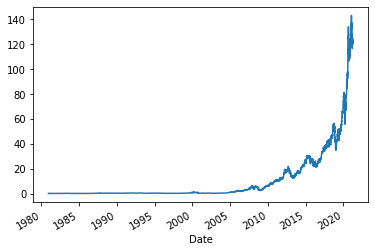

In [ ]:
df_aapl.Close.plot()

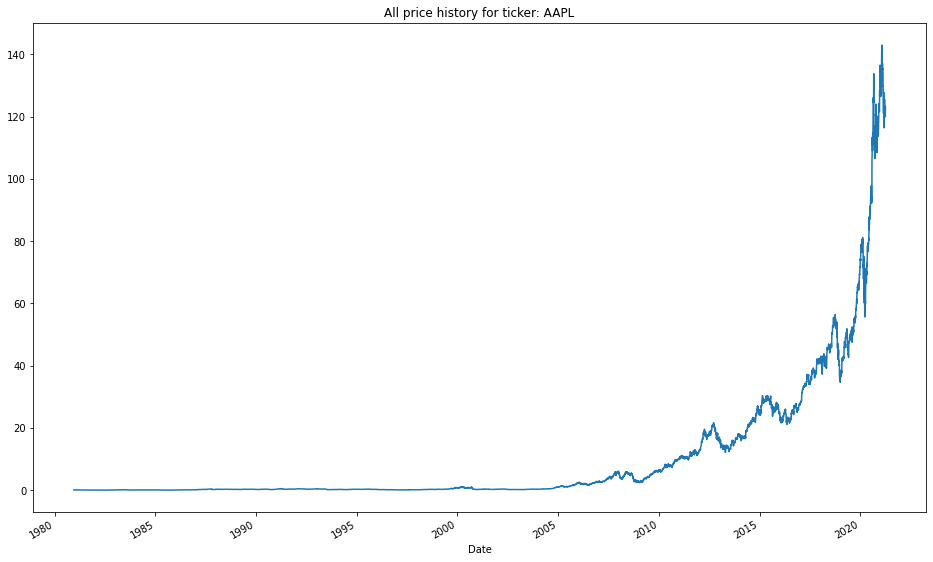

In [ ]:
df_aapl.Close.plot(figsize=(16,10), title='All price history for ticker: '+ticker)

# 2. Dynamic Graphs with Plotly
https://plotly.com/python/line-charts/#line-plot-with-plotlyexpress

In [ ]:
# https://plotly.com/python/line-charts/
import plotly.express as px

In [ ]:
fig = px.line(df_aapl, x = df_aapl.index, y = "Close", title = 'Dynamic graph for '+ ticker)
fig.show()

# 3. Pandas Datareader: stock indexes (SNP500)

* https://github.com/pydata/pandas-datareader -- Pandas datareader is a collection of many readers
* https://pydata.github.io/pandas-datareader/remote_data.html#stooq-index-data
* https://stooq.com/t/ -- all indexes list

In [ ]:
# https://pydata.github.io/pandas-datareader/remote_data.html#stooq-index-data
# https://stooq.com/t/. -- all indexes list

import pandas_datareader.data as pdr
from datetime import date

In [ ]:
end = date.today()
print(f' year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-40, month=end.month, day=end.day) 

print(f'Period 1 year until today: {start} to {end} ')

 year = 2021; month= 4; day=2
Period 1 year until today: 1981-04-02 to 2021-04-02 


In [ ]:
spx_index = pdr.get_data_stooq('^SPX', start, end) 

In [ ]:
spx_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10086 entries, 2021-04-01 to 1981-04-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10086 non-null  float64
 1   High    10086 non-null  float64
 2   Low     10086 non-null  float64
 3   Close   10086 non-null  float64
 4   Volume  10086 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 472.8 KB


In [ ]:
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-04-01,3992.78,4020.63,3992.78,4019.87,2179348929
2021-03-31,3967.25,3994.41,3966.98,3972.89,2420427567
2021-03-30,3963.34,3968.01,3944.35,3958.55,2134267391
2021-03-29,3969.31,3981.83,3943.25,3971.09,2418405500
2021-03-26,3917.12,3978.19,3917.12,3974.54,2655374920


In [ ]:
fig = px.line(spx_index, x= spx_index.index, y= "Close", title='Dynamic graph for S&P500')
fig.show()

# 4. Quandl: Gold prices

In [ ]:
!pip install quandl

In [ ]:
import quandl

In [ ]:
# https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
london_fixing_gold_price = quandl.get("LBMA/GOLD",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")

In [ ]:
london_fixing_gold_price.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1981-04-02,517.00,519.50,230.938,232.262,NaN,NaN
1981-04-03,523.50,523.00,236.450,237.511,NaN,NaN
1981-04-06,534.25,533.75,245.181,245.042,NaN,NaN
1981-04-07,517.00,514.25,237.156,235.462,NaN,NaN
1981-04-08,508.00,508.50,230.365,229.654,NaN,NaN


In [ ]:
fig = px.line(london_fixing_gold_price, x= london_fixing_gold_price.index, y= "USD (AM)", title='Dynamic graph for Gold USD (AM)')
fig.show()